<a href="https://colab.research.google.com/github/Pakhi27/MNIST-DATASET-RBM/blob/main/MNIST_DATASET_RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import urllib.request
with urllib.request.urlopen("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week4/data/utils.py") as url:
    response = url.read()
target = open('utils.py', 'w')
target.write(response.decode('utf-8'))
target.close

<function TextIOWrapper.close()>

In [ ]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.9.0
!pip install pillow==8.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for grpcio
  Running setup.py clean for grpcio
Failed to build grpcio
ERROR: Could not build wheels for grpcio, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pillow: filename=Pillow-8.1.0-cp310-cp310-linux_x86_64.whl size=1163238 sha256=5064cf314a4670d10d63c66d89be73d5fd17d880cca8f6d8a475ddc3fdd2308d
  Stored in directory: /root/.cache/pip/wheels/69/ff/e2/ff104a7329d86003512672dcce62234921a9bfb347340fd52c
Successfully built pillow


In [3]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if not tf.__version__ == '2.9.0':
    printmd('<<<<<!!!!! ERROR !!!! please upgrade to TensorFlow 2.9.0, or restart your Kernel (Kernel->Restart & Clear Output)>>>>>')

In [ ]:
# An RBM has two layers. The first layer of the RBM is called the visible (or input layer). Imagine that our toy example, has only vectors with 7 values, so the visible layer must have 𝑉=7
#  input nodes. The second layer is the hidden layer, which has 𝐻
#  neurons in our case. Each hidden node takes on values of either 0 or 1 (i.e., ℎ𝑖=1
#  or ℎ𝑖
#  = 0), with a probability that is a logistic function of the inputs it receives from the other 𝑉
#  visible units, called for example, 𝑝(ℎ𝑖=1)
# . For our toy sample, we'll use 2 nodes in the hidden layer, so  𝐻=2

In [4]:
# Each node in the first layer also has a bias. We will denote the bias as  𝑣𝑏𝑖𝑎𝑠
# , and this single value is shared among the  𝑉
#  visible units.

# The bias of the second is defined similarly as  ℎ𝑏𝑖𝑎𝑠
# , and this single value among the  𝐻
#  hidden units.
v_bias = tf.Variable(tf.zeros([7]), tf.float32)
h_bias = tf.Variable(tf.zeros([2]), tf.float32)

In [5]:
import numpy as np

In [ ]:
# We have to define weights among the input layer and hidden layer nodes. In the weight matrix, the number of rows are equal to the input nodes, and the number of columns are equal to the output nodes. We define a tensor  𝐖
  # of shape = (7,2), where the number of visible neurons = 7, and the number of hidden neurons = 2.

In [6]:
W = tf.constant(np.random.normal(loc=0.0, scale=1.0, size=(7, 2)).astype(np.float32))

In [ ]:
# Think of RBM as a model that has been trained based on images of a dataset of many SUV and sedan cars. Also, imagine that the RBM network has only two hidden nodes, where one node encodes the weight and, and the other encodes the size. In a sense, the different configurations represent different cars, where one is an SUV and the other is Sedan. In a training process, through many forward and backward passes, the RBM adjust its weights to send a stronger signal to either the SUV node (0, 1) or the sedan node (1, 0) in the hidden layer, given the pixels of images. Now, given an SUV in hidden layer, which distribution of pixels should we expect? RBM can give you 2 things. First, it encodes your images in hidden layer. Second, it gives you the probability of observing a case, given some hidden values.

In [ ]:
# let's look at a toy example for one case out of all input. Assume that we have a trained RBM, and a very simple input vector, such as [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0].

In [7]:
X = tf.constant([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]], tf.float32)

v_state = X
print ("Input: ", v_state)

h_bias = tf.constant([0.1, 0.1])
print ("hb: ", h_bias)
print ("w: ", W)

# Calculate the probabilities of turning the hidden units on:
h_prob = tf.nn.sigmoid(tf.matmul(v_state, W) + h_bias)  #probabilities of the hidden units
print ("p(h|v): ", h_prob)

# Draw samples from the distribution:
h_state = tf.nn.relu(tf.sign(h_prob - tf.random.uniform(tf.shape(h_prob)))) #states
print ("h0 states:", h_state)

Input:  tf.Tensor([[1. 0. 0. 1. 0. 0. 0.]], shape=(1, 7), dtype=float32)
hb:  tf.Tensor([0.1 0.1], shape=(2,), dtype=float32)
w:  tf.Tensor(
[[-0.25382772  0.6437238 ]
 [ 1.0464311  -0.5834538 ]
 [ 0.01132196  1.1731493 ]
 [-1.1089132   0.24882641]
 [ 1.4930598   1.1138735 ]
 [ 0.00391042 -0.91897744]
 [ 1.4316306  -0.95643026]], shape=(7, 2), dtype=float32)
p(h|v):  tf.Tensor([[0.2205024  0.72959137]], shape=(1, 2), dtype=float32)
h0 states: tf.Tensor([[0. 0.]], shape=(1, 2), dtype=float32)


In [ ]:
# Phase 2) Backward Pass (Reconstruction): The RBM reconstructs data by making several forward and backward passes between the visible and hidden layers.So, in the second phase (i.e. reconstruction phase), the samples from the hidden layer (i.e.  𝐡
#  ) becomes the input in the backward pass. The same weight matrix and visible layer biases are used to passed to the sigmoid function. The reproduced output is a reconstruction which is an approximation of the original input.

In [8]:
vb = tf.constant([0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1])
print ("b: ", vb)
v_prob = tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(W)) + vb)
print ("p(vi∣h): ", v_prob)
v_state = tf.nn.relu(tf.sign(v_prob - tf.random.uniform(tf.shape(v_prob))))
print ("v probability states: ", v_state)

b:  tf.Tensor([0.1 0.2 0.1 0.1 0.1 0.2 0.1], shape=(7,), dtype=float32)
p(vi∣h):  tf.Tensor([[0.5249792 0.549834  0.5249792 0.5249792 0.5249792 0.549834  0.5249792]], shape=(1, 7), dtype=float32)
v probability states:  tf.Tensor([[0. 1. 1. 1. 1. 1. 0.]], shape=(1, 7), dtype=float32)


In [ ]:
# given current state of hidden units and weights, what is the probability of generating [1. 0. 0. 1. 0. 0. 0.] in reconstruction phase, based on the above probability distribution function?

In [9]:
inp = X
print("input X:" , inp.numpy())

print("probablity vector:" , v_prob[0].numpy())
v_probability = 1

for elm, p in zip(inp[0],v_prob[0]) :
    if elm ==1:
        v_probability *= p
    else:
        v_probability *= (1-p)

print("probability of generating X: " , v_probability.numpy())

input X: [[1. 0. 0. 1. 0. 0. 0.]]
probablity vector: [0.5249792 0.549834  0.5249792 0.5249792 0.5249792 0.549834  0.5249792]
probability of generating X:  0.005986424


MNIST DATASET-RBM MODEL

In [10]:
#loading training and test data
mnist = tf.keras.datasets.mnist
(trX, trY), (teX, teY) = mnist.load_data()

# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')
trX = flatten(trX/255.0)
trY = flatten(trY/255.0)

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
# MNIST images have 784 pixels, so the visible layer must have 784 input nodes. For our case, we'll use 50 nodes in the hidden layer, so i = 50.
vb = tf.Variable(tf.zeros([784]), tf.float32)
hb = tf.Variable(tf.zeros([50]), tf.float32)

In [12]:
# Let  𝐖 be the Tensor of 784x50 (784 - number of visible neurons, 50 - number of hidden neurons) that represents weights between the neurons.
W = tf.Variable(tf.zeros([784,50]), tf.float32)

In [13]:
# Lets define the visible layer:
v0_state = tf.Variable(tf.zeros([784]), tf.float32)

#testing to see if the matrix product works
tf.matmul( [v0_state], W)

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)>

In [18]:
# Now, we can define hidden layer:
#computing the hidden nodes probability vector and checking shape
h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
print("h0_state shape: " , tf.shape(h0_prob))

#defining a function to return only the generated hidden states
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state


h0_state = hidden_layer(v0_state, W, hb)
print("first 15 hidden states: ", h0_state[0][0:15])

h0_state shape:  tf.Tensor([ 1 50], shape=(2,), dtype=int32)
first 15 hidden states:  tf.Tensor([0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.], shape=(15,), dtype=float32)


In [19]:
# Now, we define reconstruction part:
def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb)
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]

v1_state = reconstructed_output(h0_state, W, vb)
print("hidden state shape: ", h0_state.shape)
print("v0 state shape:  ", v0_state.shape)
print("v1 state shape:  ", v1_state.shape)

hidden state shape:  (1, 50)
v0 state shape:   (784,)
v1 state shape:   (784,)


In [ ]:
# Calculate error:
# In each epoch, we compute the "error" as a sum of the squared difference between step 1 and step n, e.g the error shows the difference between the data and its reconstruction.

# Note: tf.reduce_mean computes the mean of elements across dimensions of a tensor.

In [20]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0_state - v1_state))
print("error" , err.numpy())

error 0.4655612


Training the Model


In [21]:
h1_prob = tf.nn.sigmoid(tf.matmul([v1_state], W) + hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random.uniform(tf.shape(h1_prob)))) #sample_h_given_X

In [22]:

# error of the first run:
print("error: ", error(v0_state, v1_state))

error:  tf.Tensor(0.4655612, shape=(), dtype=float32)


In [23]:
#Parameters
alpha = 0.01
epochs = 1
batchsize = 200
weights = []
errors = []
batch_number = 0
K = 1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((trX, trY)).batch(batchsize)

for epoch in range(epochs):
    for batch_x, batch_y in train_ds:
        batch_number += 1
        for i_sample in range(batchsize):
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0)

                v0_state = v1_state

            if i_sample == batchsize-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % epoch,
                       "batch #: %i " % batch_number, "of %i" % int(60e3/batchsize),
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)



Epoch: 0 batch #: 1  of 300 sample #: 199 reconstruction error: 0.145101
Epoch: 0 batch #: 2  of 300 sample #: 199 reconstruction error: 0.230925
Epoch: 0 batch #: 3  of 300 sample #: 199 reconstruction error: 0.123611
Epoch: 0 batch #: 4  of 300 sample #: 199 reconstruction error: 0.130733
Epoch: 0 batch #: 5  of 300 sample #: 199 reconstruction error: 0.120506
Epoch: 0 batch #: 6  of 300 sample #: 199 reconstruction error: 0.192886
Epoch: 0 batch #: 7  of 300 sample #: 199 reconstruction error: 0.093386
Epoch: 0 batch #: 8  of 300 sample #: 199 reconstruction error: 0.118408
Epoch: 0 batch #: 9  of 300 sample #: 199 reconstruction error: 0.104064
Epoch: 0 batch #: 10  of 300 sample #: 199 reconstruction error: 0.160635
Epoch: 0 batch #: 11  of 300 sample #: 199 reconstruction error: 0.084878
Epoch: 0 batch #: 12  of 300 sample #: 199 reconstruction error: 0.158960
Epoch: 0 batch #: 13  of 300 sample #: 199 reconstruction error: 0.062843
Epoch: 0 batch #: 14  of 300 sample #: 199 reco

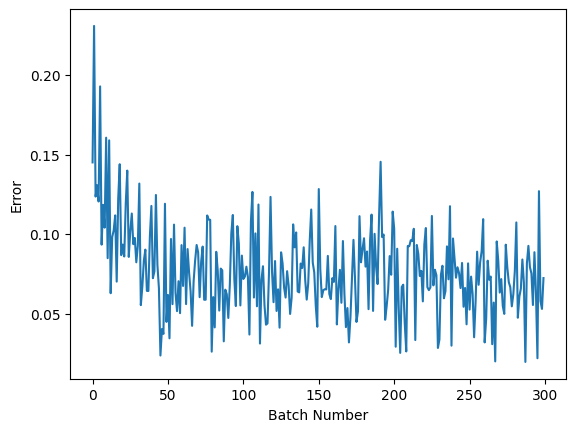

In [24]:
# Let's take a look at the errors at the end of each batch:
import matplotlib.pyplot as plt
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

In [ ]:
#  final weight matrix  𝑊 after training?

In [25]:
print(W.numpy()) # a weight matrix of shape (50,784)

[[-0.41999987 -0.30999997 -0.46999982 ... -0.28       -0.57999974
  -0.44999984]
 [-0.42999986 -0.31999996 -0.40999988 ... -0.28       -0.44999984
  -0.45999983]
 [-0.3799999  -0.29999998 -0.4799998  ... -0.29       -0.5299998
  -0.43999985]
 ...
 [-0.41999987 -0.34999993 -0.41999987 ... -0.22000003 -0.5099998
  -0.45999983]
 [-0.44999984 -0.26000002 -0.43999985 ... -0.27       -0.55999976
  -0.41999987]
 [-0.3899999  -0.31999996 -0.46999982 ... -0.18       -0.5099998
  -0.43999985]]


In [ ]:
# Learned features-We can take each hidden unit and visualize the connections between that hidden unit and each element in the input vector. In our case, we have 50 hidden units. Lets visualize those.Let's plot the current weights: tile_raster_images helps in generating an easy to grasp image from a set of samples or weights. It transforms the uw (with one flattened image per row of size 784), into an array (of size  28×28
#  ) in which images are reshaped and laid out like tiles on a floor

In [ ]:
!pip install theano
import theano
self.ctor = getattr(np, o_type.dtype)



AttributeError: partially initialized module 'theano' has no attribute 'compile' (most likely due to a circular import)

In [ ]:
import cv2

def resize_image(image, target_shape=(28, 28)):
    return cv2.resize(image, target_shape, interpolation=cv2.INTER_AREA)  # Adjust interpolation as needed

# Resize each image in X
resized_X = []
for image in X:
    resized_image = resize_image(image)
    resized_X.append(resized_image)

# Proceed with your code using resized_X


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [ ]:
# Let's look at one of the learned weights corresponding to one of hidden units for example. In this particular square, the gray color represents weight = 0, and the whiter it is, the more positive the weights are (closer to 1). Conversely, the darker pixels are, the more negative the weights. The positive pixels will increase the probability of activation in hidden units (after multiplying by input/visible pixels), and negative pixels will decrease the probability of a unit hidden to be 1

In [31]:
import numpy as np
from PIL import Image

# Assuming X is a numpy array of your images
num_images = X.shape[0]  # Get the number of images
rows, cols = 5, 10  # Desired tile shape
valid_images = []
for i in range(num_images):
  if X[i].shape == (28, 28):  # Check for expected shape
    valid_images.append(X[i])

# Create the tiled image using only valid_images
# ... (rest of your code using valid_images)

# Create a new image to hold the tiled images
tiled_image = np.zeros((rows * 28 + (rows - 1) * 1, cols * 28 + (cols - 1) * 1))

# Loop through each image and place it in the tiled image
for i in range(num_images):
    row = i // cols  # Calculate row position
    col = i % cols  # Calculate column position
    # tiled_image[row * (28 + 1): (row + 1) * 28 + row * 1, col * (28 + 1): (col + 1) * 28 + col * 1] = X[i]

# Convert the tiled image array to PIL Image
image = Image.fromarray(tiled_image.astype(np.uint8))


print(X.shape)  # Check the overall shape of X (e.g., (num_images, 28, 28))
for i in range(num_images):
    print(X[i].shape)  # Check the shape of each image in X

# Each tile in the above visualization corresponds to a vector of connections between a hidden unit and visible layer's units.

(1, 7)
(7,)


In [27]:
# from PIL import Image
# image = Image.fromarray(tile_raster_images(X =W.numpy().T[10:11], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
# ### Plot image
# plt.rcParams['figure.figsize'] = (4.0, 4.0)
# imgplot = plt.imshow(image)
# imgplot.set_cmap('gray')
import matplotlib.pyplot as plt
import numpy as np

# Assuming W is a NumPy array representing your image data
image_data = W.numpy().T[10:11]  # Assuming W.shape is (..., C, H, W) and you want the 11th image

# Reshape to ensure it's a 2D array (grayscale or RGB)
if len(image_data.shape) == 3 and image_data.shape[0] == 1:
    image_data = image_data.squeeze(axis=0)  # Remove channel dimension if it has only 1 channel

# Plot the image
plt.imshow(image_data, cmap='gray' if len(image_data.shape) == 2 else None)  # Use grayscale for single-channel images
plt.axis('off')  # Hide axes for cleaner visualization (optional)
plt.show()


Let's look at the reconstruction of an image now. Imagine that we have a destructed image of figure 3. Lets see if our trained network can fix it:

First we plot the image:


--2024-07-09 14:37:56--  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.box.com (ibm.box.com)... 74.112.186.144
Connecting to ibm.box.com (ibm.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2024-07-09 14:37:56--  https://ibm.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2024-07-09 14:37:56--  https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.ent.box.com (ibm.ent.box.com)... 74.112.186.144
Connecting to ibm.ent.box.com (ibm.ent.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b

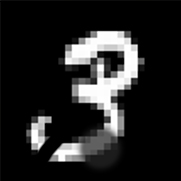

In [ ]:
!wget -O destructed3.jpg  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
img = Image.open('destructed3.jpg')
img

In [ ]:
# Now let's pass this image through the neural net:
# convert the image to a 1d numpy array
sample_case = np.array(img.convert('I').resize((28,28))).ravel().reshape((1, -1))/255.0

sample_case = tf.cast(sample_case, dtype=tf.float32)

In [ ]:
# Feed the sample case into the network and reconstruct the output:
hh0_p = tf.nn.sigmoid(tf.matmul(sample_case, W) + hb)
hh0_s = tf.round(hh0_p)

print("Probability nodes in hidden layer:" ,hh0_p)
print("activated nodes in hidden layer:" ,hh0_s)

# reconstruct
vv1_p = tf.nn.sigmoid(tf.matmul(hh0_s, tf.transpose(W)) + vb)

print(vv1_p)
#rec_prob = sess.run(vv1_p, feed_dict={ hh0_s: hh0_s_val, W: prv_w, vb: prv_vb})

Probability nodes in hidden layer: tf.Tensor(
[[1.8272132e-09 6.1066346e-11 3.9711235e-08 9.9999976e-01 6.0918279e-05
  9.9991846e-01 4.8473451e-04 1.8103814e-09 6.3904528e-11 7.4562448e-01
  9.9924135e-01 6.0629170e-02 1.9615881e-10 9.9999863e-01 2.0118398e-06
  2.5869036e-09 1.7232649e-01 1.0269916e-12 1.0000000e+00 2.9697282e-15
  2.7667182e-03 4.4996749e-08 9.9993849e-01 4.8392083e-16 8.7891603e-03
  9.9995017e-01 9.9947143e-01 4.1531461e-05 9.9776310e-01 1.5544149e-11
  9.9359280e-01 1.4325983e-02 9.9989903e-01 2.2471423e-20 1.3460979e-09
  2.5200913e-08 3.5682112e-02 3.8088848e-17 9.9999988e-01 9.2965060e-01
  9.9964267e-01 1.8894634e-05 2.7928575e-06 3.1482850e-12 8.9794570e-01
  4.8548833e-01 1.2237122e-15 9.9998516e-01 1.0000000e+00 1.0000000e+00]], shape=(1, 50), dtype=float32)
activated nodes in hidden layer: tf.Tensor(
[[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
  1. 1.]]

In [29]:
# Here we plot the reconstructed image:
# img = Image.fromarray(tile_raster_images(X=vv1_p.numpy(), img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
# plt.rcParams['figure.figsize'] = (4.0, 4.0)
# imgplot = plt.imshow(img)
# imgplot.set_cmap('gray')
import matplotlib.pyplot as plt
import numpy as np

# Assuming W is a NumPy array representing your image data
image_data = W.numpy().T[10:11]  # Assuming W.shape is (..., C, H, W) and you want the 11th image

# Reshape to ensure it's a 2D array (grayscale or RGB)
if len(image_data.shape) == 3 and image_data.shape[0] == 1:
    image_data = image_data.squeeze(axis=0)  # Remove channel dimension if it has only 1 channel

# Plot the image
plt.imshow(image_data, cmap='gray' if len(image_data.shape) == 2 else None)  # Use grayscale for single-channel images
plt.axis('off')  # Hide axes for cleaner visualization (optional)
plt.show()
